<a href="https://colab.research.google.com/github/ludoveltz/test_github_fev25/blob/main/Exc_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns  # Seaborn inclut le dataset Iris

In [3]:
# Chargement du dataset Iris directement depuis seaborn
iris_df = sns.load_dataset('iris')

# Affichage des premières lignes
print("First few rows of the Iris dataset:")
print(iris_df.head())

# Information générale sur le dataset
print("\nDataset Information:")
print(iris_df.info())

First few rows of the Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
# Création d'un dictionnaire pour classifier les colonnes
column_classification = {
    'sepal_length': {
        'type': 'Quantitative',
        'reason': 'Continuous numerical measurement in centimeters'
    },
    'sepal_width': {
        'type': 'Quantitative',
        'reason': 'Continuous numerical measurement in centimeters'
    },
    'petal_length': {
        'type': 'Quantitative',
        'reason': 'Continuous numerical measurement in centimeters'
    },
    'petal_width': {
        'type': 'Quantitative',
        'reason': 'Continuous numerical measurement in centimeters'
    },
    'species': {
        'type': 'Qualitative',
        'reason': 'Categorical variable representing different iris species'
    }
}

# Affichage de la classification
print("\nColumn Classification:")
for column, info in column_classification.items():
    print(f"\nColumn: {column}")
    print(f"Type: {info['type']}")
    print(f"Reason: {info['reason']}")



Column Classification:

Column: sepal_length
Type: Quantitative
Reason: Continuous numerical measurement in centimeters

Column: sepal_width
Type: Quantitative
Reason: Continuous numerical measurement in centimeters

Column: petal_length
Type: Quantitative
Reason: Continuous numerical measurement in centimeters

Column: petal_width
Type: Quantitative
Reason: Continuous numerical measurement in centimeters

Column: species
Type: Qualitative
Reason: Categorical variable representing different iris species


In [5]:
# Statistiques descriptives pour les colonnes quantitatives
print("\nDescriptive Statistics for Quantitative Variables:")
print(iris_df.describe())

# Distribution des variables qualitatives
print("\nDistribution of Qualitative Variables:")
print(iris_df['species'].value_counts())



Descriptive Statistics for Quantitative Variables:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Distribution of Qualitative Variables:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


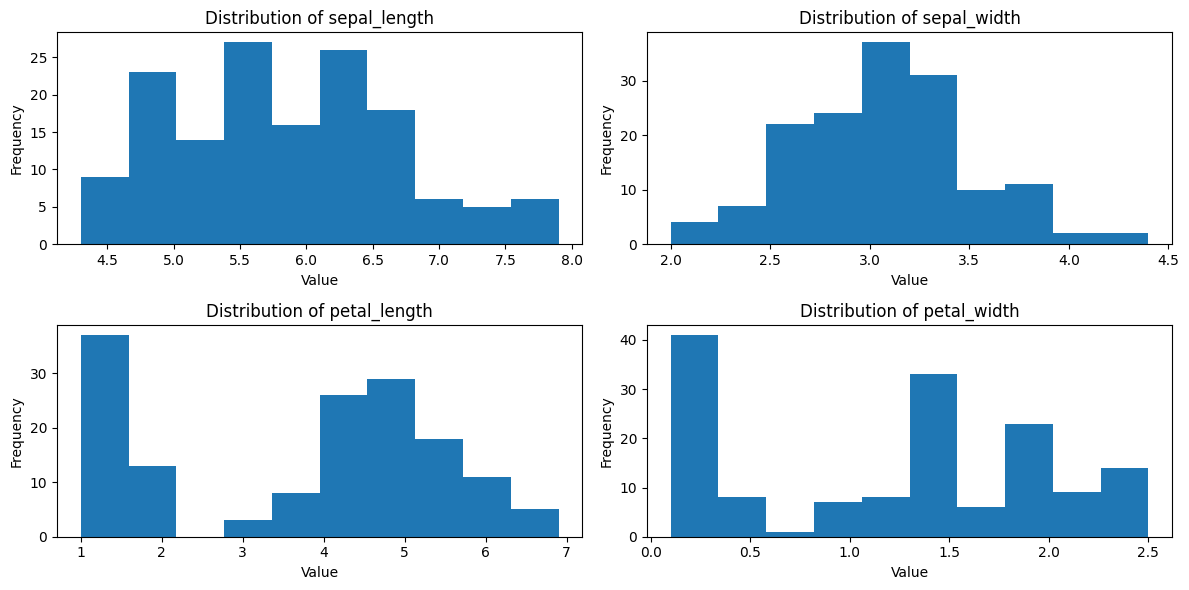

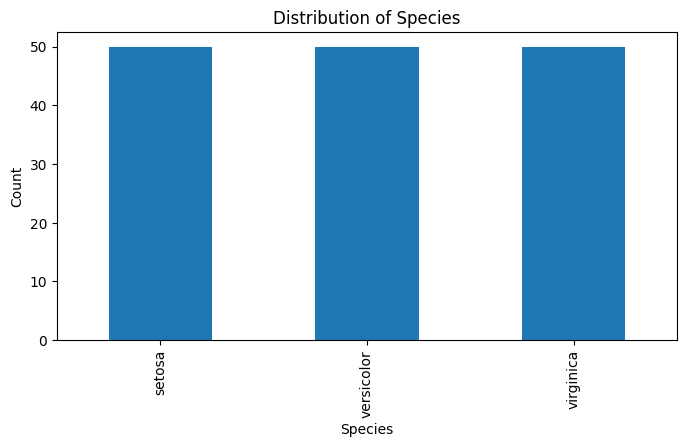

In [6]:
# Import de matplotlib
import matplotlib.pyplot as plt

# Configuration de la taille des graphiques
plt.figure(figsize=(12, 6))

# Histogrammes pour les variables quantitatives
for i, column in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    plt.hist(iris_df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Diagramme en barres pour la variable qualitative
plt.figure(figsize=(8, 4))
iris_df['species'].value_counts().plot(kind='bar')
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


In [7]:
# 1. BASIC STATISTICAL ANALYSIS
print("=== STATISTICAL ANALYSIS OF QUANTITATIVE COLUMNS ===\n")

# List of quantitative columns
quantitative_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for column in quantitative_columns:
    print(f"Analysis of {column}:")
    print(f"Mean: {iris_df[column].mean():.2f}")
    print(f"Median: {iris_df[column].median():.2f}")
    print(f"Mode: {iris_df[column].mode().values[0]:.2f}")
    print("-" * 50)

=== STATISTICAL ANALYSIS OF QUANTITATIVE COLUMNS ===

Analysis of sepal_length:
Mean: 5.84
Median: 5.80
Mode: 5.00
--------------------------------------------------
Analysis of sepal_width:
Mean: 3.06
Median: 3.00
Mode: 3.00
--------------------------------------------------
Analysis of petal_length:
Mean: 3.76
Median: 4.35
Mode: 1.40
--------------------------------------------------
Analysis of petal_width:
Mean: 1.20
Median: 1.30
Mode: 0.20
--------------------------------------------------


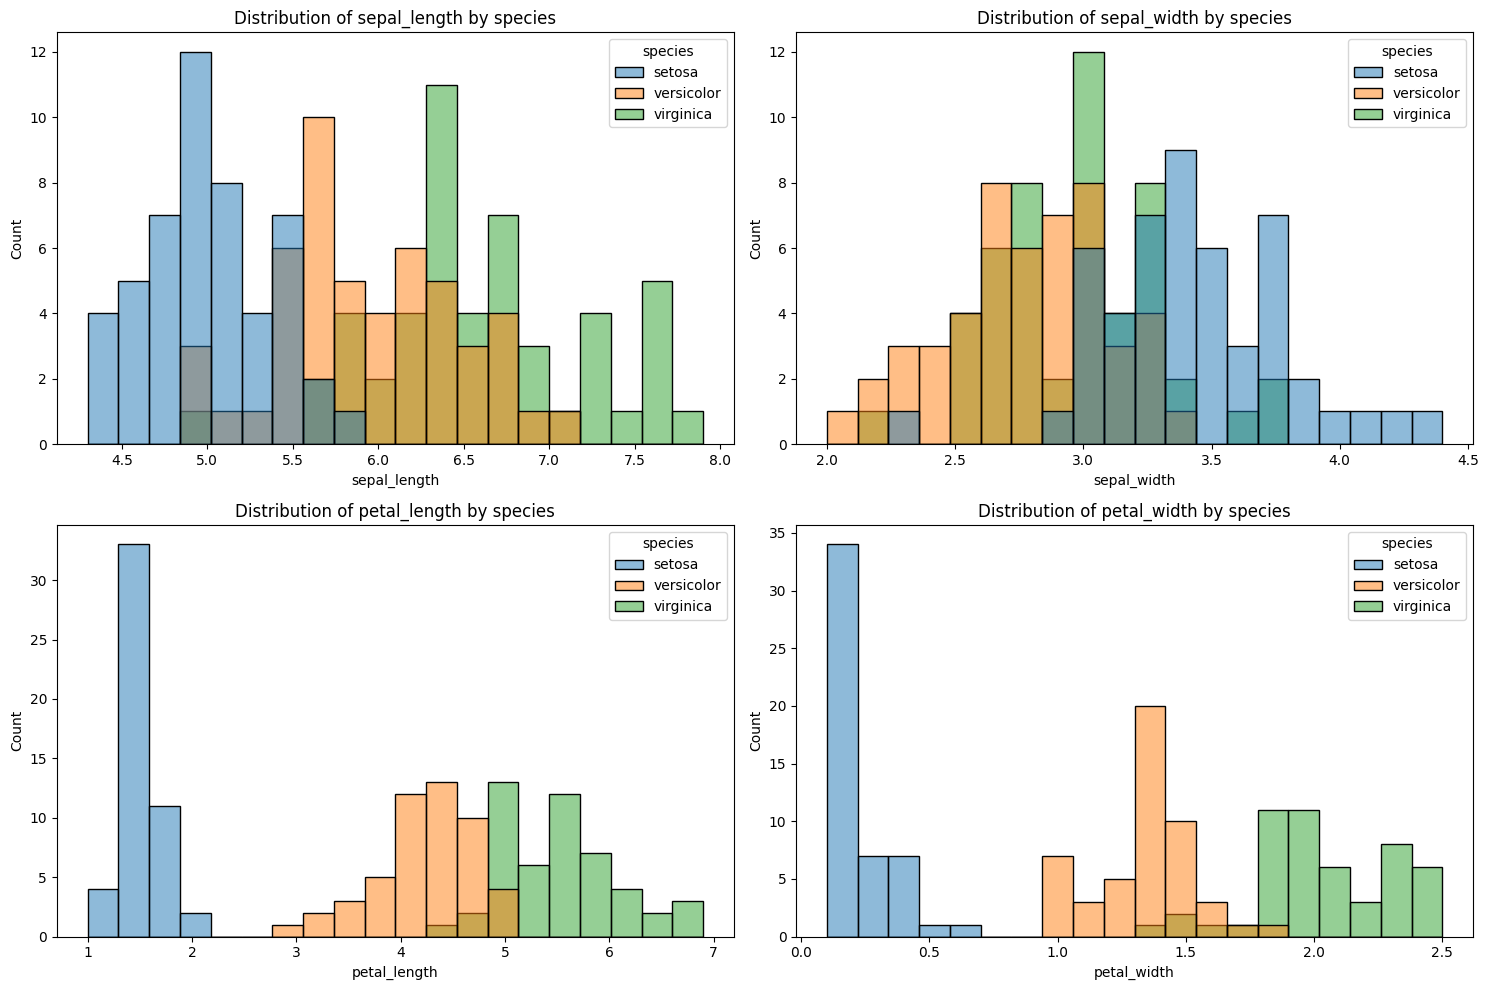

In [8]:
# 2. VISUALIZATIONS

# A. Histogram for each quantitative variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(quantitative_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=iris_df, x=column, hue='species', bins=20)
    plt.title(f'Distribution of {column} by species')
plt.tight_layout()
plt.show()

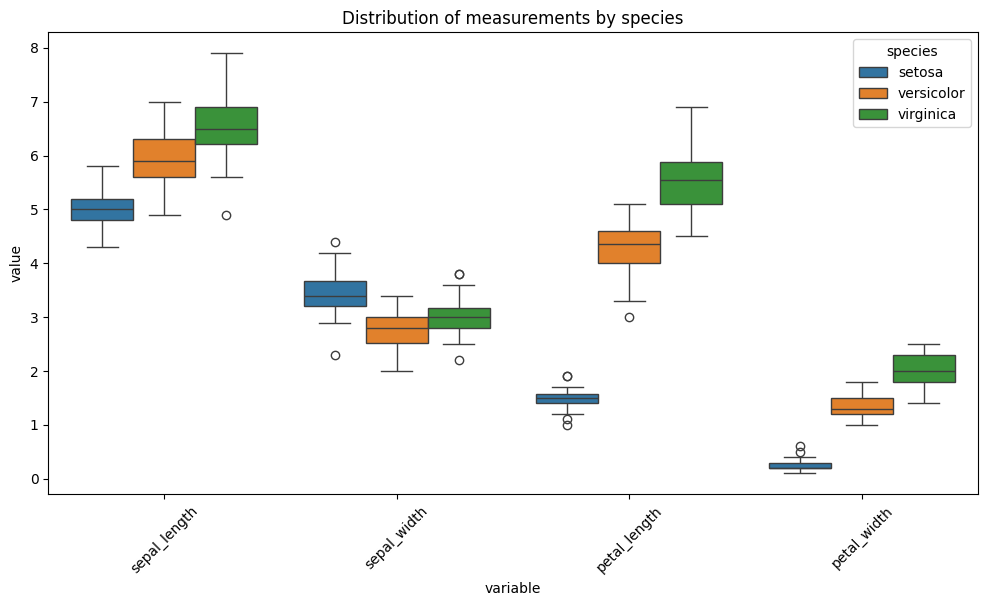

In [9]:
# B. Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris_df.melt(id_vars=['species'],
                             value_vars=quantitative_columns),
            x='variable', y='value', hue='species')
plt.title('Distribution of measurements by species')
plt.xticks(rotation=45)
plt.show()

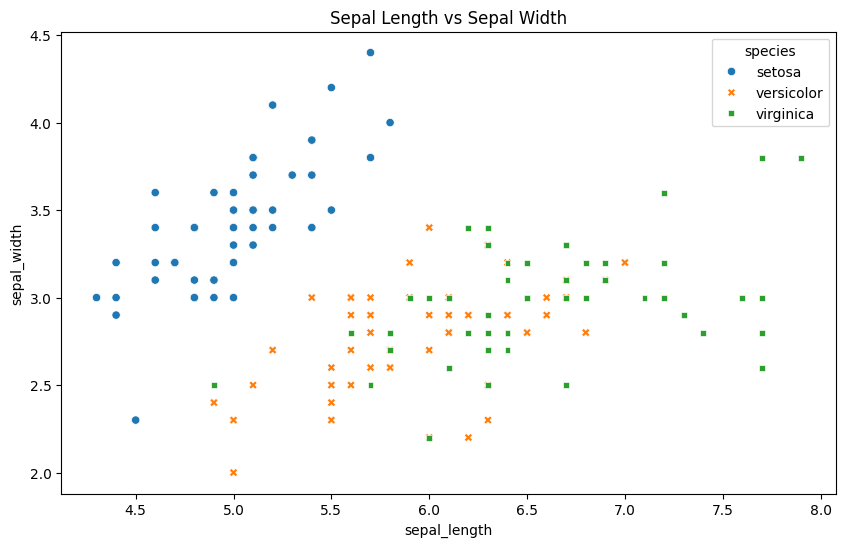

In [10]:
# C. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width',
                hue='species', style='species')
plt.title('Sepal Length vs Sepal Width')
plt.show()


=== SUMMARY OF OBSERVATIONS ===

Descriptive Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length          1.00        -0.12          0.87         0.82
sepal_width          -0.12         1.00         -0.43        -0.37
petal_length          0.87        -0.43          1.00         0.96
petal_width           0.82        -0.37          0.96         1.00


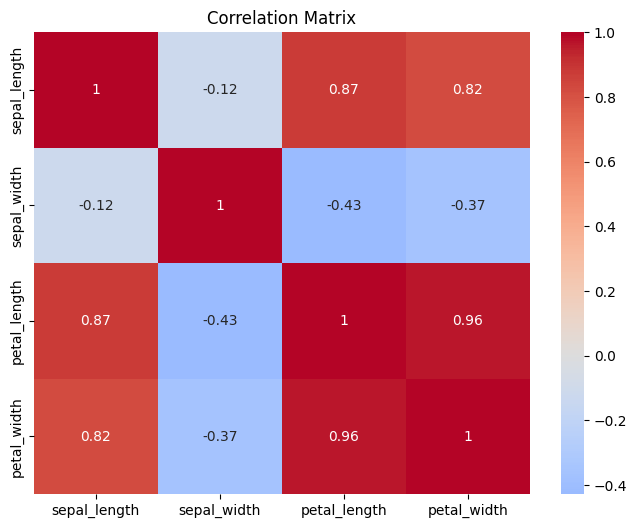

In [11]:
# 3. SUMMARY OF RESULTS
print("\n=== SUMMARY OF OBSERVATIONS ===\n")

# Complete descriptive statistics
print("Descriptive Statistics:")
print(iris_df[quantitative_columns].describe())

# Correlations
print("\nCorrelation Matrix:")
correlation_matrix = iris_df[quantitative_columns].corr()
print(correlation_matrix.round(2))

# Correlation matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Documentation of Results:

Statistical Analysis:
Calculation of central tendency measures (mean, median, mode)
Distribution identification for each variable
Potential outlier detection

Visualizations:
Histograms: Show measurement distributions
Box plots: Reveal dispersion and outliers
Scatter plot: Shows relationships between variables
Heatmap: Visualizes correlations

Interpretation:
Histograms show the distribution of measurements
Box plots reveal variability between species
Scatter plot shows separation between species
Correlation matrix indicates relationships between variables